# Social Network Analysis
----------------------------------------
Osiris Cámara Salinas

In [3]:
from ast import literal_eval

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
artists_df = pd.read_csv("artists_related_bts.csv", converters={"genres":literal_eval, "related_artist_ids":literal_eval, "related_artist_names":literal_eval})

In [4]:
artists_df

,id,name,popularity,genres,related_artist_ids,related_artist_names
0,3Nrfpe0tUJi4K4DXYWgMUX,BTS,91,"[k-pop, k-pop boy group]","[0b1sIQumIAsNbqAoIClSpy, 3JsHnjpbhX4SnySpvpa9D...","[j-hope, V, RM, NCT 127, Eric Nam, Stray Kids,..."
1,0b1sIQumIAsNbqAoIClSpy,j-hope,79,"[k-pop, k-rap]","[3JsHnjpbhX4SnySpvpa9DK, 2auC28zjQyVTsiZKNgPRG...","[V, RM, Jackson Wang, Eric Nam, PENTAGON, WOOD..."
2,3JsHnjpbhX4SnySpvpa9DK,V,66,"[j-division, korean ost]","[0b1sIQumIAsNbqAoIClSpy, 2auC28zjQyVTsiZKNgPRG...","[j-hope, RM, Jackson Wang, SURAN, Eric Nam, Hw..."
3,2auC28zjQyVTsiZKNgPRGs,RM,63,[k-rap],"[0b1sIQumIAsNbqAoIClSpy, 3JsHnjpbhX4SnySpvpa9D...","[j-hope, V, Eric Nam, SURAN, A.C.E, Jackson Wa..."
4,7f4ignuCJhLXfZ9giKT7rH,NCT 127,68,"[k-pop, k-pop boy group]","[1gBUSTR3TyDdTVFIaQnc02, 48eO052eSDcn8aTxiv6Qa...","[NCT DREAM, NCT, SEVENTEEN, NCT U, TAEMIN, THE..."
...,...,...,...,...,...,...
95,6VJXRJvRRyLv99RZbXJ8RO,JBJ,30,"[k-pop, k-pop boy group]","[0lE4Ctn38KnvJ56oGRkNx7, 43GYq8c6nVEgaEyg0qtzJ...","[HotShot, IN2IT, TRCNG, JEONG SEWOON, NU'EST W..."
96,4RYQvLQe6W9FuaLp3x8hob,MAMADOL,36,[k-pop],"[6BgYuNomEs12UIrnxhWE9a, 5dEBuZjTtE68uDgCs23Ku...","[TRI.BE, BVNDIT, PURPLE KISS, PIXY, WJSN THE B..."
97,5t5FqBwTcgKTaWmfEbwQY9,ENHYPEN,75,"[anime, k-pop boy group]","[3JjvsPeGMbDJqsphe2z8xU, 0CmvFWTX9zmMNCUi6fHtA...","[P1Harmony, THE BOYZ, ATEEZ, TOMORROW X TOGETH..."
98,5vGoWnZO65NBgiZYBmi3iW,KANGDANIEL,54,[k-pop],"[1fWUcRSok57yRm8gPKj1Fc, 4y0wFJ5jmCUNRLZfsw1I7...","[VERIVERY, AB6IX, KIM WOO SEOK, CIX, Golden Ch..."


In [5]:
artists_df["name"]

0            BTS
1         j-hope
2              V
3             RM
4        NCT 127
         ...    
95           JBJ
96       MAMADOL
97       ENHYPEN
98    KANGDANIEL
99        WONWOO
Name: name, Length: 100, dtype: object

## 📌 Visualization of the Social Network.

In [6]:
G = nx.DiGraph()

In [7]:
G

In [8]:
names = [name for name in artists_df["name"]]
G.add_nodes_from(names)

In [9]:
edges = []
for name, related_artist_names in zip(artists_df["name"], artists_df["related_artist_names"]):
    for related_name in related_artist_names:
        if related_name in names:
            e = (name, related_name)
            edges.append(e)
            # print(e)


G.add_edges_from(edges)

In [11]:
pos = nx.kamada_kawai_layout(G)

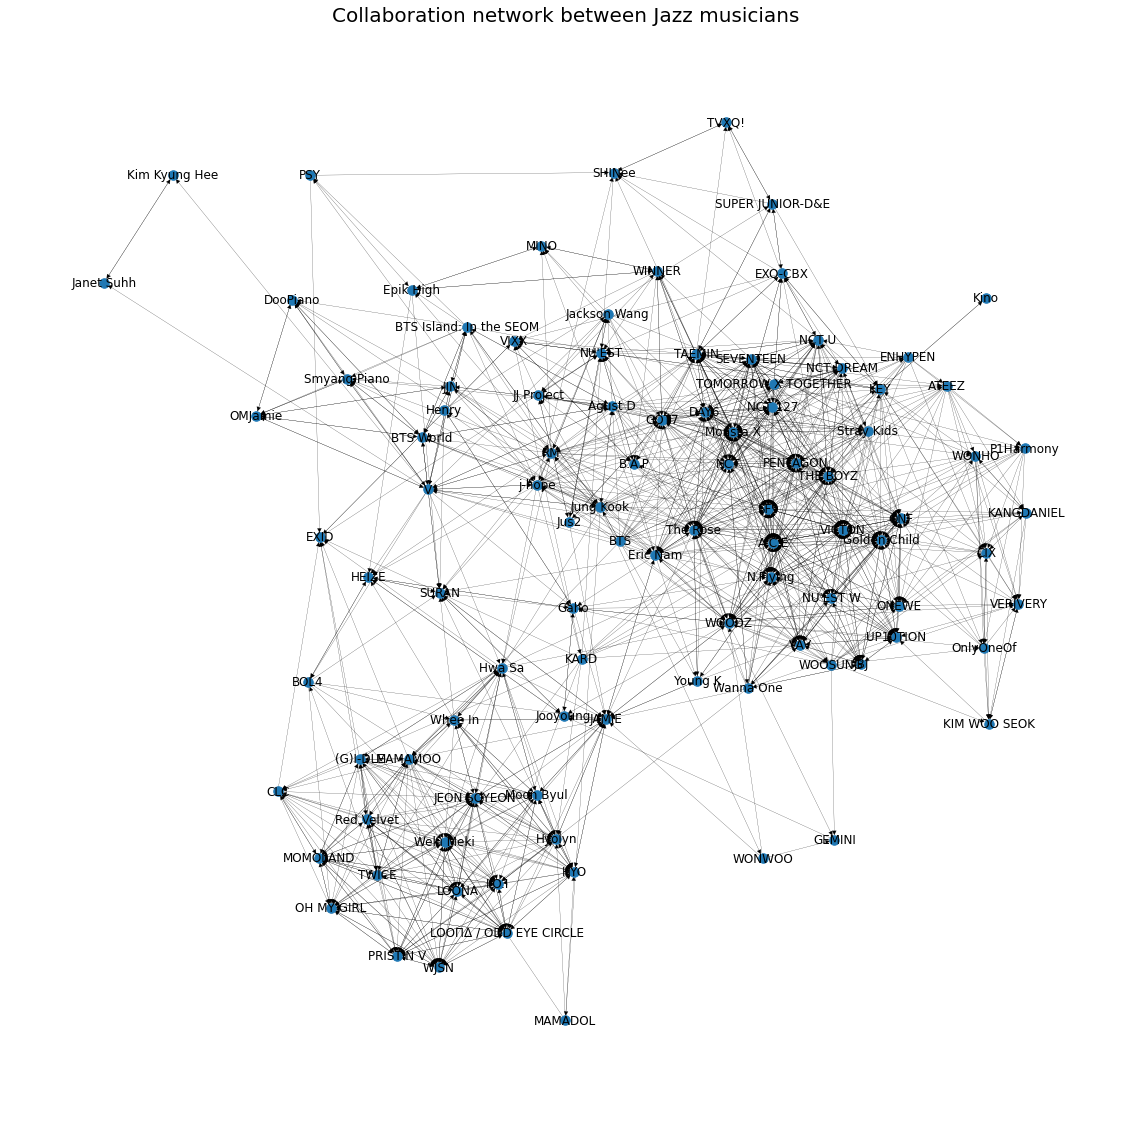

In [12]:
plt.figure(figsize=(20, 20))
plt.title("Collaboration network between Jazz musicians", fontsize = 20)
nx.draw(G, node_size = 90, pos = pos, width= 0.2, with_labels = True)
plt.show()